In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train=X_train/255
X_test=X_test/255

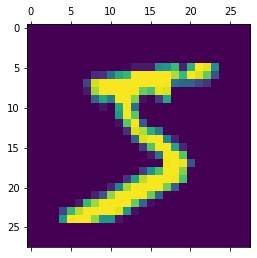

In [5]:
plt.matshow(X_train[0])

In [6]:
model=keras.Sequential(
[
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(10,activation='sigmoid') 
   
]
)
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
     metrics=['accuracy']

)

In [16]:
model.fit(x=X_train,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4667 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9259


In [18]:
model.evaluate(x=X_test,y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2693 - accuracy: 0.9258


[0.26925379037857056, 0.9258000254631042]

In [19]:
y_pred=model.predict(x=X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_test[0]

7

In [23]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label[0]

7

In [24]:
cm=tf.math.confusion_matrix(y_test,y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   8,    7,  926,   20,    9,    4,   13,   12,   30,    3],
       [   3,    0,   18,  928,    0,   21,    2,   13,   18,    7],
       [   1,    1,    5,    2,  917,    0,   12,    4,   10,   30],
       [  12,    1,    3,   39,    9,  772,   17,    7,   26,    6],
       [  14,    3,    6,    1,    7,    8,  916,    2,    1,    0],
       [   2,    5,   21,    7,    4,    0,    0,  966,    2,   21],
       [  13,    5,    8,   29,    9,   26,   10,   13,  852,    9],
       [  12,    6,    1,   11,   29,    8,    0,   30,    4,  908]])>

Text(33.0, 0.5, 'Actual')

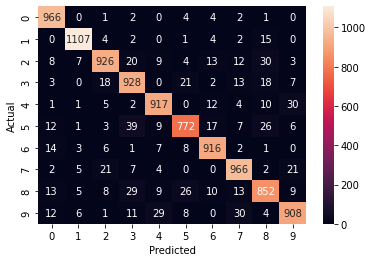

In [25]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [39]:
model=keras.Sequential(
[
   keras.layers.Flatten(input_shape=(28,28)), 
   keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='tanh'), 
   keras.layers.Dense(10,activation='sigmoid'), 
   
]
)
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
     metrics=['accuracy']

)

In [40]:
model.fit(x=X_train,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2449 - accuracy: 0.9294
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1036 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0723 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0546 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0437 - accuracy: 0.9863


In [41]:
model.evaluate(x=X_test,y=y_test)
y_pred=model.predict(x=X_test)
y_pred_label=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


In [34]:
cm=tf.math.confusion_matrix(y_test,y_pred_label)

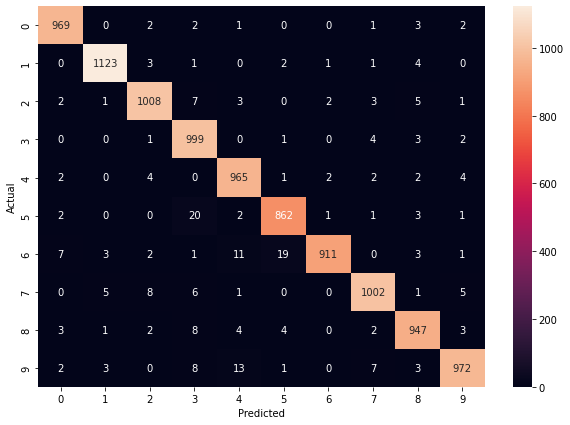

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
df=pd.read_csv('E:/DS/Datasets/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges=pd.to_numeric(df.TotalCharges.replace(' ','0'))

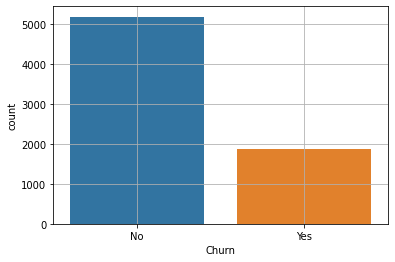

In [8]:
sns.countplot(x=df.Churn,data=df)
plt.grid()

In [9]:
ten_yes=df[df.Churn=='Yes'].tenure
ten_no=df[df.Churn=='No'].tenure

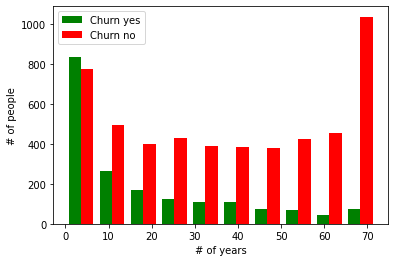

In [10]:
plt.hist([ten_yes,ten_no],color=['green','red'],label=['Churn yes','Churn no']
        )
plt.xlabel('# of years')
plt.ylabel('# of people')
plt.legend()

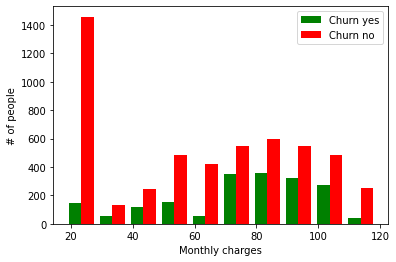

In [11]:
ten_yes=df[df.Churn=='Yes'].MonthlyCharges
ten_no=df[df.Churn=='No'].MonthlyCharges
plt.hist([ten_yes,ten_no],color=['green','red'],label=['Churn yes','Churn no']
        )
plt.xlabel('Monthly charges')
plt.ylabel('# of people')
plt.legend()

In [12]:
def print_unique(df):
    for col in df:
        if df[col].dtype=='object':
            print(f'{col}:{df[col].unique()}')

In [13]:
print_unique(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [14]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)
print_unique(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [15]:
df.replace('No',0,inplace=True)
df.replace('Yes',1,inplace=True)
print_unique(df)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
df.replace({'Female':0,'Male':1},inplace=True)

In [17]:
print_unique(df)

InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [19]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [20]:
col=['MonthlyCharges','TotalCharges','tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[col]=scaler.fit_transform(df[col])
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4857,0,0,0,0,0.277778,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3655,0,0,1,0,0.444444,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4806,1,0,0,0,0.930556,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [67]:
def ANN(X_train, X_test, y_train, y_test,epochs=100):
    model=keras.Sequential(
    [
       keras.layers.Dense(26,activation='relu',input_shape=(26,)),
       keras.layers.Dense(15,activation='relu'),
       keras.layers.Dense(1,activation='sigmoid')  

    ]
    )
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']

    )
    model.fit(x=X_train,y=y_train,epochs=epochs)
    y_pred=model.predict(x=X_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_test,y_pred))  
    return y_pred

In [29]:
X=df.drop('Churn',axis=1)
Y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify=Y)

In [34]:
ANN(X_train, X_test, y_train, y_test,epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6021 - accuracy: 0.6846
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7441
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7472
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7505
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.7492
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7572
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7552
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7572
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.7602
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.7609
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8047
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8114
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8117
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8124
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8094
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8104
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4042 - accuracy: 0.8157
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8124
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8137
Epoch 93/100


### Class Imbalance Problem Handling  

#### 1. Under Sampling 
- Take #of samples from majority
- Sample should be equal or round about minority class data points
- concate both and train your model

In [35]:
count_class_0,count_class_1=df.Churn.value_counts()
df_class_0=df[df['Churn']==0]
df_class_1=df[df['Churn']==1]
print(df_class_0.shape,df_class_1.shape)

(5174, 27) (1869, 27)


In [36]:
df_class_0=df_class_0.sample(count_class_1)
df_under=pd.concat([df_class_0,df_class_1],axis=0)
df_under.shape

(3738, 27)

In [37]:
X=df_under.drop('Churn',axis=1)
Y=df_under['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify=Y)
ANN(X_train, X_test, y_train, y_test,epochs=100)

Epoch 1/200
94/94 [==============================] - 1s 2ms/step - loss: 0.6671 - accuracy: 0.5980
Epoch 2/200
94/94 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7455
Epoch 3/200
94/94 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7559
Epoch 4/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7535
Epoch 5/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7559
Epoch 6/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7645
Epoch 7/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7642
Epoch 8/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7676
Epoch 9/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7682
Epoch 10/200
94/94 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7732
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8204
Epoch 84/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8217
Epoch 85/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8151
Epoch 86/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8224
Epoch 87/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8181
Epoch 88/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8254
Epoch 89/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8184
Epoch 90/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8201
Epoch 91/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8271
Epoch 92/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8207
Epoch 93/200


#### 2. Oversampling
- Copy your miniority class to majority class
- Concate both train model

In [38]:
count_class_0,count_class_1=df.Churn.value_counts()
df_class_0=df[df['Churn']==0]
df_class_1=df[df['Churn']==1]
print(df_class_0.shape,df_class_1.shape)
df_class_1=df_class_1.sample(count_class_0,replace=True)
df_over=pd.concat([df_class_0,df_class_1],axis=0)
df_over.shape

(5174, 27) (1869, 27)


(10348, 27)

In [39]:
X=df_over.drop('Churn',axis=1)
Y=df_over['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify=Y)
ANN(X_train, X_test, y_train, y_test,epochs=100)

Epoch 1/200
259/259 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.7167
Epoch 2/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.7631
Epoch 3/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.7664
Epoch 4/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4806 - accuracy: 0.7713
Epoch 5/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.7705
Epoch 6/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.7705
Epoch 7/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.7755
Epoch 8/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.7735
Epoch 9/200
259/259 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.7753
Epoch 10/200
259/259 [==============================] - 1s 3ms/step - loss: 0.4640 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8548
Epoch 161/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8556
Epoch 162/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8541
Epoch 163/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8548
Epoch 164/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8526
Epoch 165/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8561
Epoch 166/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8565
Epoch 167/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8552
Epoch 168/200
259/259 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8589
Epoch 169/200
259/259 [==============================] - 1s 3ms/step - loss: 0.3381 - a

#### 3. SMOTE(Synthetic Minority Over-Sampling Technique)
- Use KNN Algo to produce synthetic sampling
- combine new created samples
 

In [ ]:
#pip install -U imbalanced-learn

In [23]:
X=df.drop('Churn',axis=1)
Y=df['Churn']
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority')
X_sm,y_sm=sm.fit_resample(X,Y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1,stratify=y_sm)
ANN(X_train, X_test, y_train, y_test,epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7416
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4788 - accuracy: 0.7745
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.7780
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.7834
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7868
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4492 - accuracy: 0.7858
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4437 - accuracy: 0.7909
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.7931
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.7949
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4306 - accura

#### 4. Essenmbling with undersampling
- Divide majority class equal size of minority class 
- combine with minority
- Trainn model on all 
- voting on prediction

In [52]:
X=df.drop('Churn',axis=1)
Y=df['Churn']
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1,stratify=Y)

In [54]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [55]:
4139/1495
#aprox is 3

2.768561872909699

In [56]:
4139/3

1379.6666666666667

so our sample size is 1379

In [57]:
df1 = X_train.copy()
df1['Churn'] = y_train
df1_class_0 = df1[df1['Churn']==0]
df1_class_1 = df1[df1['Churn']==1]
df1_class_0.shape, df1_class_1.shape

((4139, 27), (1495, 27))

In [64]:
def get_batch(df_min,df_maj,start,end):
        df_train = pd.concat([df_maj[start:end],df_min],axis=0)
        X_train  = df_train.drop('Churn',axis=1)
        y_train  = df_train['Churn']
        return X_train,y_train
    

In [65]:
X_train,y_train = get_batch(df1_class_1,df1_class_0,0,1379)
y_pred=ANN(X_train,X_test,y_train,y_test)

((2874, 26), (2874,))

In [68]:
y_pred=ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
90/90 [==============================] - 1s 3ms/step - loss: 0.6227 - accuracy: 0.6322
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7436
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7557
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7554
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7617
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7637
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7606
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7606
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7683
Epoch 10/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7697
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8104
Epoch 84/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8149
Epoch 85/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8142
Epoch 86/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8128
Epoch 87/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8121
Epoch 88/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8125
Epoch 89/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8125
Epoch 90/100
90/90 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8152
Epoch 91/100
90/90 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8128
Epoch 92/100
90/90 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.8177
Epoch 93/100


In [70]:
1379+1379

2758

In [75]:
X_train,y_train = get_batch(df1_class_1,df1_class_0,1379,2758)
y_pred1=ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.6392
Epoch 2/100
90/90 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7533
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7603
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.7624
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7630
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7686
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7731
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7756
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7749
Epoch 10/100
90/90 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7766
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8399
Epoch 84/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8403
Epoch 85/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8417
Epoch 86/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8441
Epoch 87/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8424
Epoch 88/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8399
Epoch 89/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8427
Epoch 90/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8448
Epoch 91/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8427
Epoch 92/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8448
Epoch 93/100


In [72]:
2758+1379

4137

In [74]:
X_train,y_train = get_batch(df1_class_1,df1_class_0,4137,5139)
y_pred2=ANN(X_train,X_test,y_train,y_test)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.9646
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9987
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9987
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9987
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9987
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9987
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9987
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9987
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9987
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9987
Epoch 11/

In [76]:
y_pred_final = []
for i in range(len(y_pred)):
    v = y_pred[i] + y_pred1[i] + y_pred2[i]
    if v>1:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [77]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      1035
           1       0.43      0.84      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.78      0.66      0.68      1409

